<a href="https://colab.research.google.com/github/hufsaim/T10306201/blob/master/notebook/Lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Segmentation

In [1]:
path1 = '<your path>'
dpiv = 64 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import scipy.signal as signal
import scipy.ndimage as nd

## Detection of Isolated Points

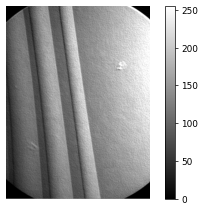

In [3]:
I = Image.open(path1+'turbineblad-with-blk-dot.tif')
f = np.array(I)
plt.figure(dpi=dpiv)
plt.imshow(f,cmap='gray',vmin=0,vmax=255)
plt.axis('off')
plt.colorbar()
plt.show()

(-0.5, 568.5, 763.5, -0.5)

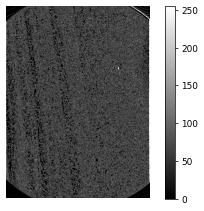

In [4]:
w = np.array([[1,1,1],[1,-8,1],[1,1,1]])
g= signal.convolve2d(I,w,mode='same')
plt.figure(dpi=dpiv)
plt.imshow(abs(g), cmap='gray', vmin=0, vmax=255)
plt.colorbar()
plt.axis('off')

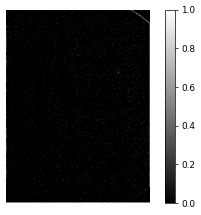

In [5]:
plt.figure(dpi=dpiv)
plt.imshow(abs(g)>200,cmap='gray')
plt.colorbar()
plt.axis('off')
plt.show()

## Line Detection

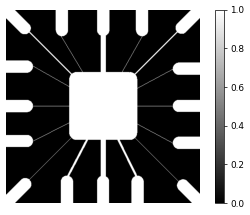

In [6]:
I = Image.open(path1+'circuitmask.tif')

f = np.array(I)
plt.figure(dpi=dpiv)
plt.imshow(f,cmap='gray')
plt.axis('off')
plt.colorbar()
plt.show()

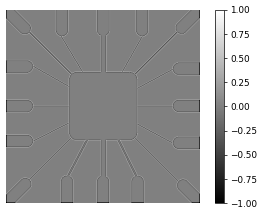

In [7]:
w = np.array([[1,1,1],[1,-8,1],[1,1,1]])
g = signal.convolve2d(f,w,mode='same')
plt.figure(dpi=dpiv)
plt.imshow(g, cmap='gray',vmin=-1, vmax=1)
plt.axis('off')
plt.colorbar()
plt.show()

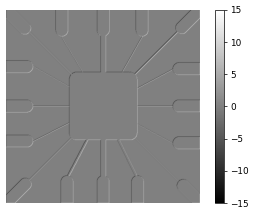

In [8]:
n = np.array([[-3,-3,5],[-3,0,5],[-3,-3,5]])
nw = np.array([[-3,5,5],[-3,0,5],[-3,-3,-3]])
w = np.array([[5,5,5],[-3,0,-3],[-3,-3,-3]])
sw = np.array([[5,5,-3],[5,0,-3],[-3,-3,-3]])
s = np.array([[5,-3,-3],[5,0,-3],[5,-3,-3]])
se = np.array([[-3,-3,-3],[5,0,-3],[5,5,-3]])
e = np.array([[-3,-3,-3],[-3,0,-3],[5,5,5]])
ne = np.array([[-3,-3,-3],[-3,0,5],[-3,5,5]])

g = signal.convolve2d(f,ne,mode='same')
plt.figure(dpi=dpiv)
plt.imshow(g, cmap='gray')
plt.colorbar()
plt.axis('off')
plt.show()

## Combining the Gradient with Thresholding

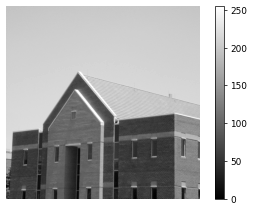

In [9]:
I = Image.open(path1+'building-600by600.tif')

f = np.array(I)
plt.figure(dpi=dpiv)
plt.imshow(f,cmap='gray')
plt.axis('off')
plt.colorbar()
plt.show()

In [10]:
box = np.ones([5,5])/(5*5)
sobel1 = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
sobel2 = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
fs = signal.convolve2d(f,box,mode='same')
fs_sb1 = signal.convolve2d(fs,sobel1,mode='same')
fs_sb2 = signal.convolve2d(fs,sobel2,mode='same')
fs_grad = abs(fs_sb1)+abs(fs_sb2)

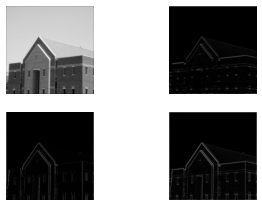

In [11]:
plt.figure(dpi=dpiv)
plt.subplot(2,2,1)
plt.imshow(fs,cmap='gray')
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(abs(fs_sb1),cmap='gray')
plt.axis('off')
plt.subplot(2,2,3)
plt.imshow(abs(fs_sb2),cmap='gray')
plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(fs_grad,cmap='gray')
plt.axis('off')
plt.show()

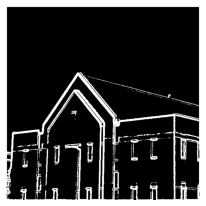

In [12]:
th = 64
plt.figure(dpi=dpiv)
plt.imshow(fs_grad>th,cmap='gray')
plt.axis('off')
plt.show()

## Thresholding

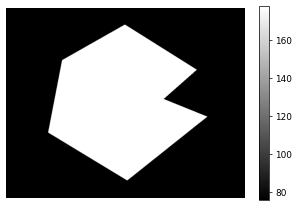

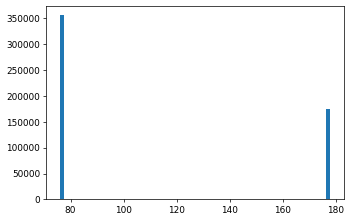

In [13]:
I = Image.open(path1+'septagon.tif')
f = np.array(I)
plt.figure(dpi=dpiv)
plt.imshow(f,cmap='gray')
plt.axis('off')
plt.colorbar()
plt.show()

plt.figure(dpi=dpiv)
plt.hist(f.ravel(),64)
plt.show()

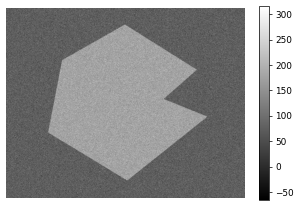

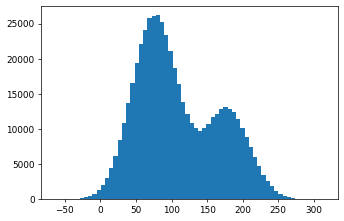

In [14]:
fn=f+32*np.random.normal(0,1,f.shape)
plt.figure(dpi=dpiv)
plt.imshow(fn,cmap='gray')
plt.axis('off')
plt.colorbar()
plt.show()

plt.figure(dpi=dpiv)
plt.hist(fn.ravel(),64)
plt.show()

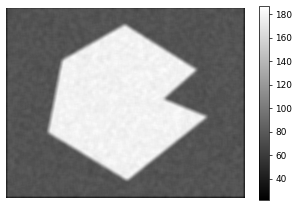

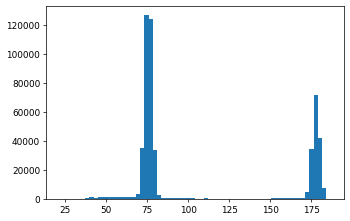

In [15]:
box = np.ones((15,15))/(15.*15.)
fns = signal.convolve2d(fn,box,mode='same')

plt.figure(dpi=dpiv)
plt.imshow(fns,cmap='gray')
plt.axis('off')
plt.colorbar()
plt.show()

plt.figure(dpi=dpiv)
plt.hist(fns.ravel(),64)
plt.show()

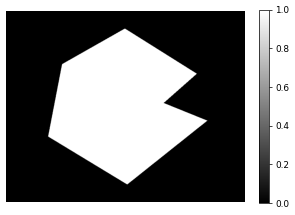

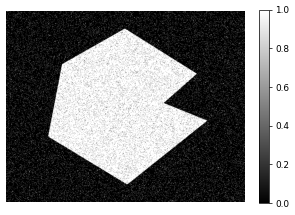

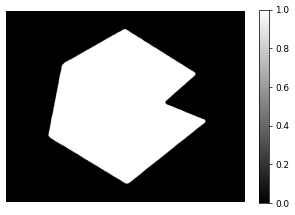

In [16]:
th = 128
plt.figure(dpi=dpiv)
plt.imshow(f>th,cmap='gray')
plt.axis('off')
plt.colorbar()
plt.show()

plt.figure(dpi=dpiv)
plt.imshow(fn>th,cmap='gray')
plt.axis('off')
plt.colorbar()
plt.show()

plt.figure(dpi=dpiv)
plt.imshow(fns>th,cmap='gray')
plt.axis('off')
plt.colorbar()
plt.show()

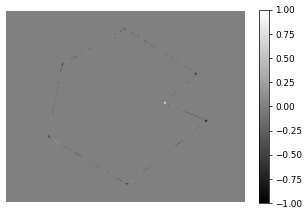

In [17]:
plt.figure(dpi=dpiv)
plt.imshow( (fns>th).astype('int') - (f>th).astype('int'),cmap='gray')
plt.axis('off')
plt.colorbar()
plt.show()

## Using Edges 

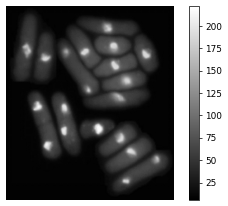

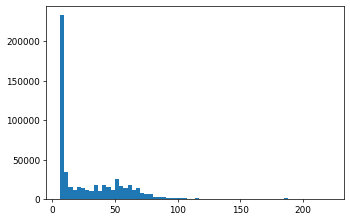

In [18]:
I = Image.open(path1+'yeast-cells.tif')
f = np.array(I)
plt.figure(dpi=dpiv)
plt.imshow(f,cmap='gray')
plt.axis('off')
plt.colorbar()
plt.show()

plt.figure(dpi=dpiv)
plt.hist(f.ravel(),64)
plt.show()

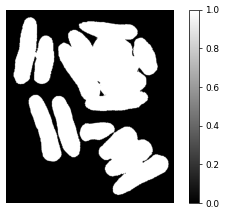

In [19]:
plt.figure(dpi=dpiv)
plt.imshow(f>30,cmap='gray')
plt.axis('off')
plt.colorbar()
plt.show()

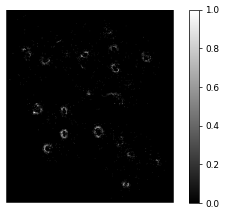

In [20]:
w = np.array([[1,1,1],[1,-8,1],[1,1,1]])
g = signal.convolve2d(f,w,mode='same')
plt.figure(dpi=dpiv)
plt.imshow(abs(g)>12, cmap='gray')
plt.axis('off')
plt.colorbar()
plt.show()

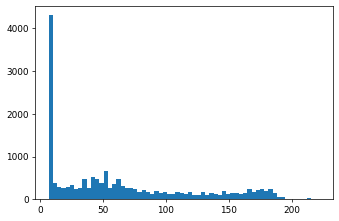

In [21]:
m = f[abs(g)>9]
plt.figure(dpi=dpiv)
plt.hist(m.ravel(),64)
plt.show()

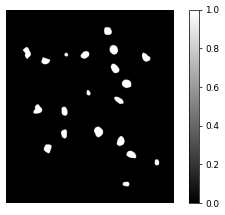

In [22]:
plt.figure(dpi=dpiv)
plt.imshow(f>120,cmap='gray')
plt.axis('off')
plt.colorbar()
plt.show()


## Multiple Thresholding

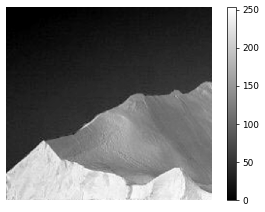

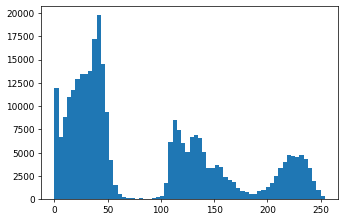

In [23]:
I = Image.open(path1+'iceberg.tif')
f = np.array(I)
plt.figure(dpi=dpiv)
plt.imshow(f,cmap='gray')
plt.axis('off')
plt.colorbar()
plt.show()

plt.figure(dpi=dpiv)
plt.hist(f.ravel(),64)
plt.show()

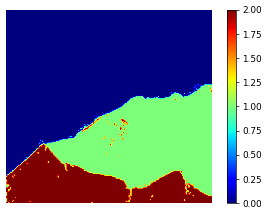

In [24]:
g = np.zeros(f.shape)
g[f>64] = 1
g[f>180] = 2
plt.figure(dpi=dpiv)
plt.imshow(g,cmap='jet')
plt.colorbar()
plt.axis('off')
plt.show()

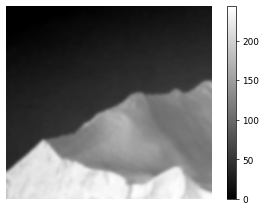

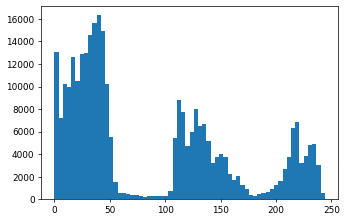

In [25]:
fs = nd.gaussian_filter(f,4)

plt.figure(dpi=dpiv)
plt.imshow(fs,cmap='gray')
plt.axis('off')
plt.colorbar()
plt.show()

plt.figure(dpi=dpiv)
plt.hist(fs.ravel(),64)
plt.show()

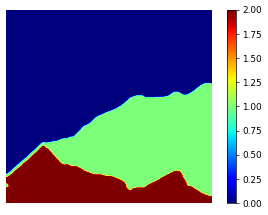

In [26]:
g = np.zeros(f.shape)
g[fs>64] = 1
g[fs>180] = 2
plt.figure(dpi=dpiv)
plt.imshow(g,cmap='jet')
plt.colorbar()
plt.axis('off')
plt.show()